<a href="https://colab.research.google.com/github/Saadi128/EDA-PROJECT-REPORT/blob/main/ML_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
# Rename columns
df.rename(columns={"Chance of Admit ": "Chance of Admit"}, inplace=True)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
# checking missing values & data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


,0
GRE_Score,0
TOEFL_Score,0
University_Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


In [20]:
# EDA
df.describe()


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


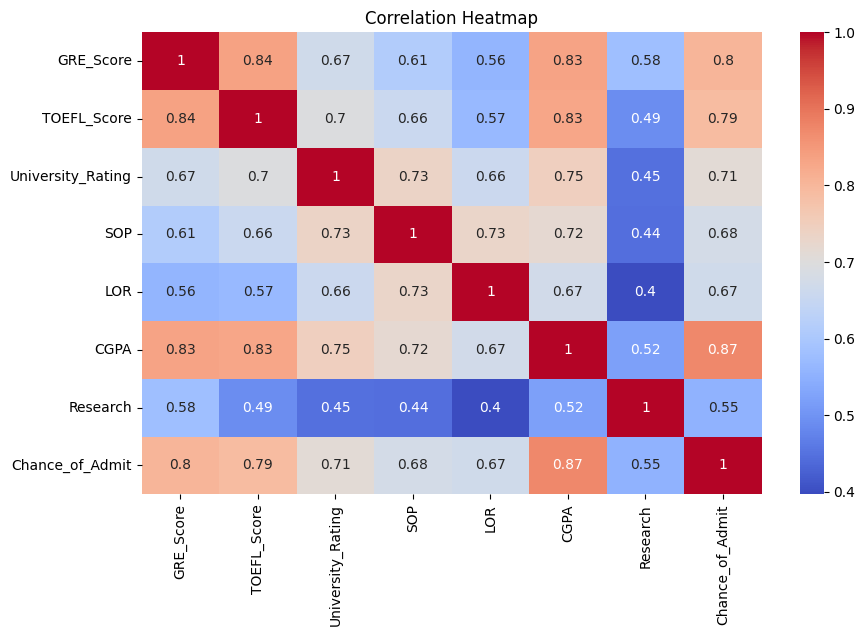

In [21]:
# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


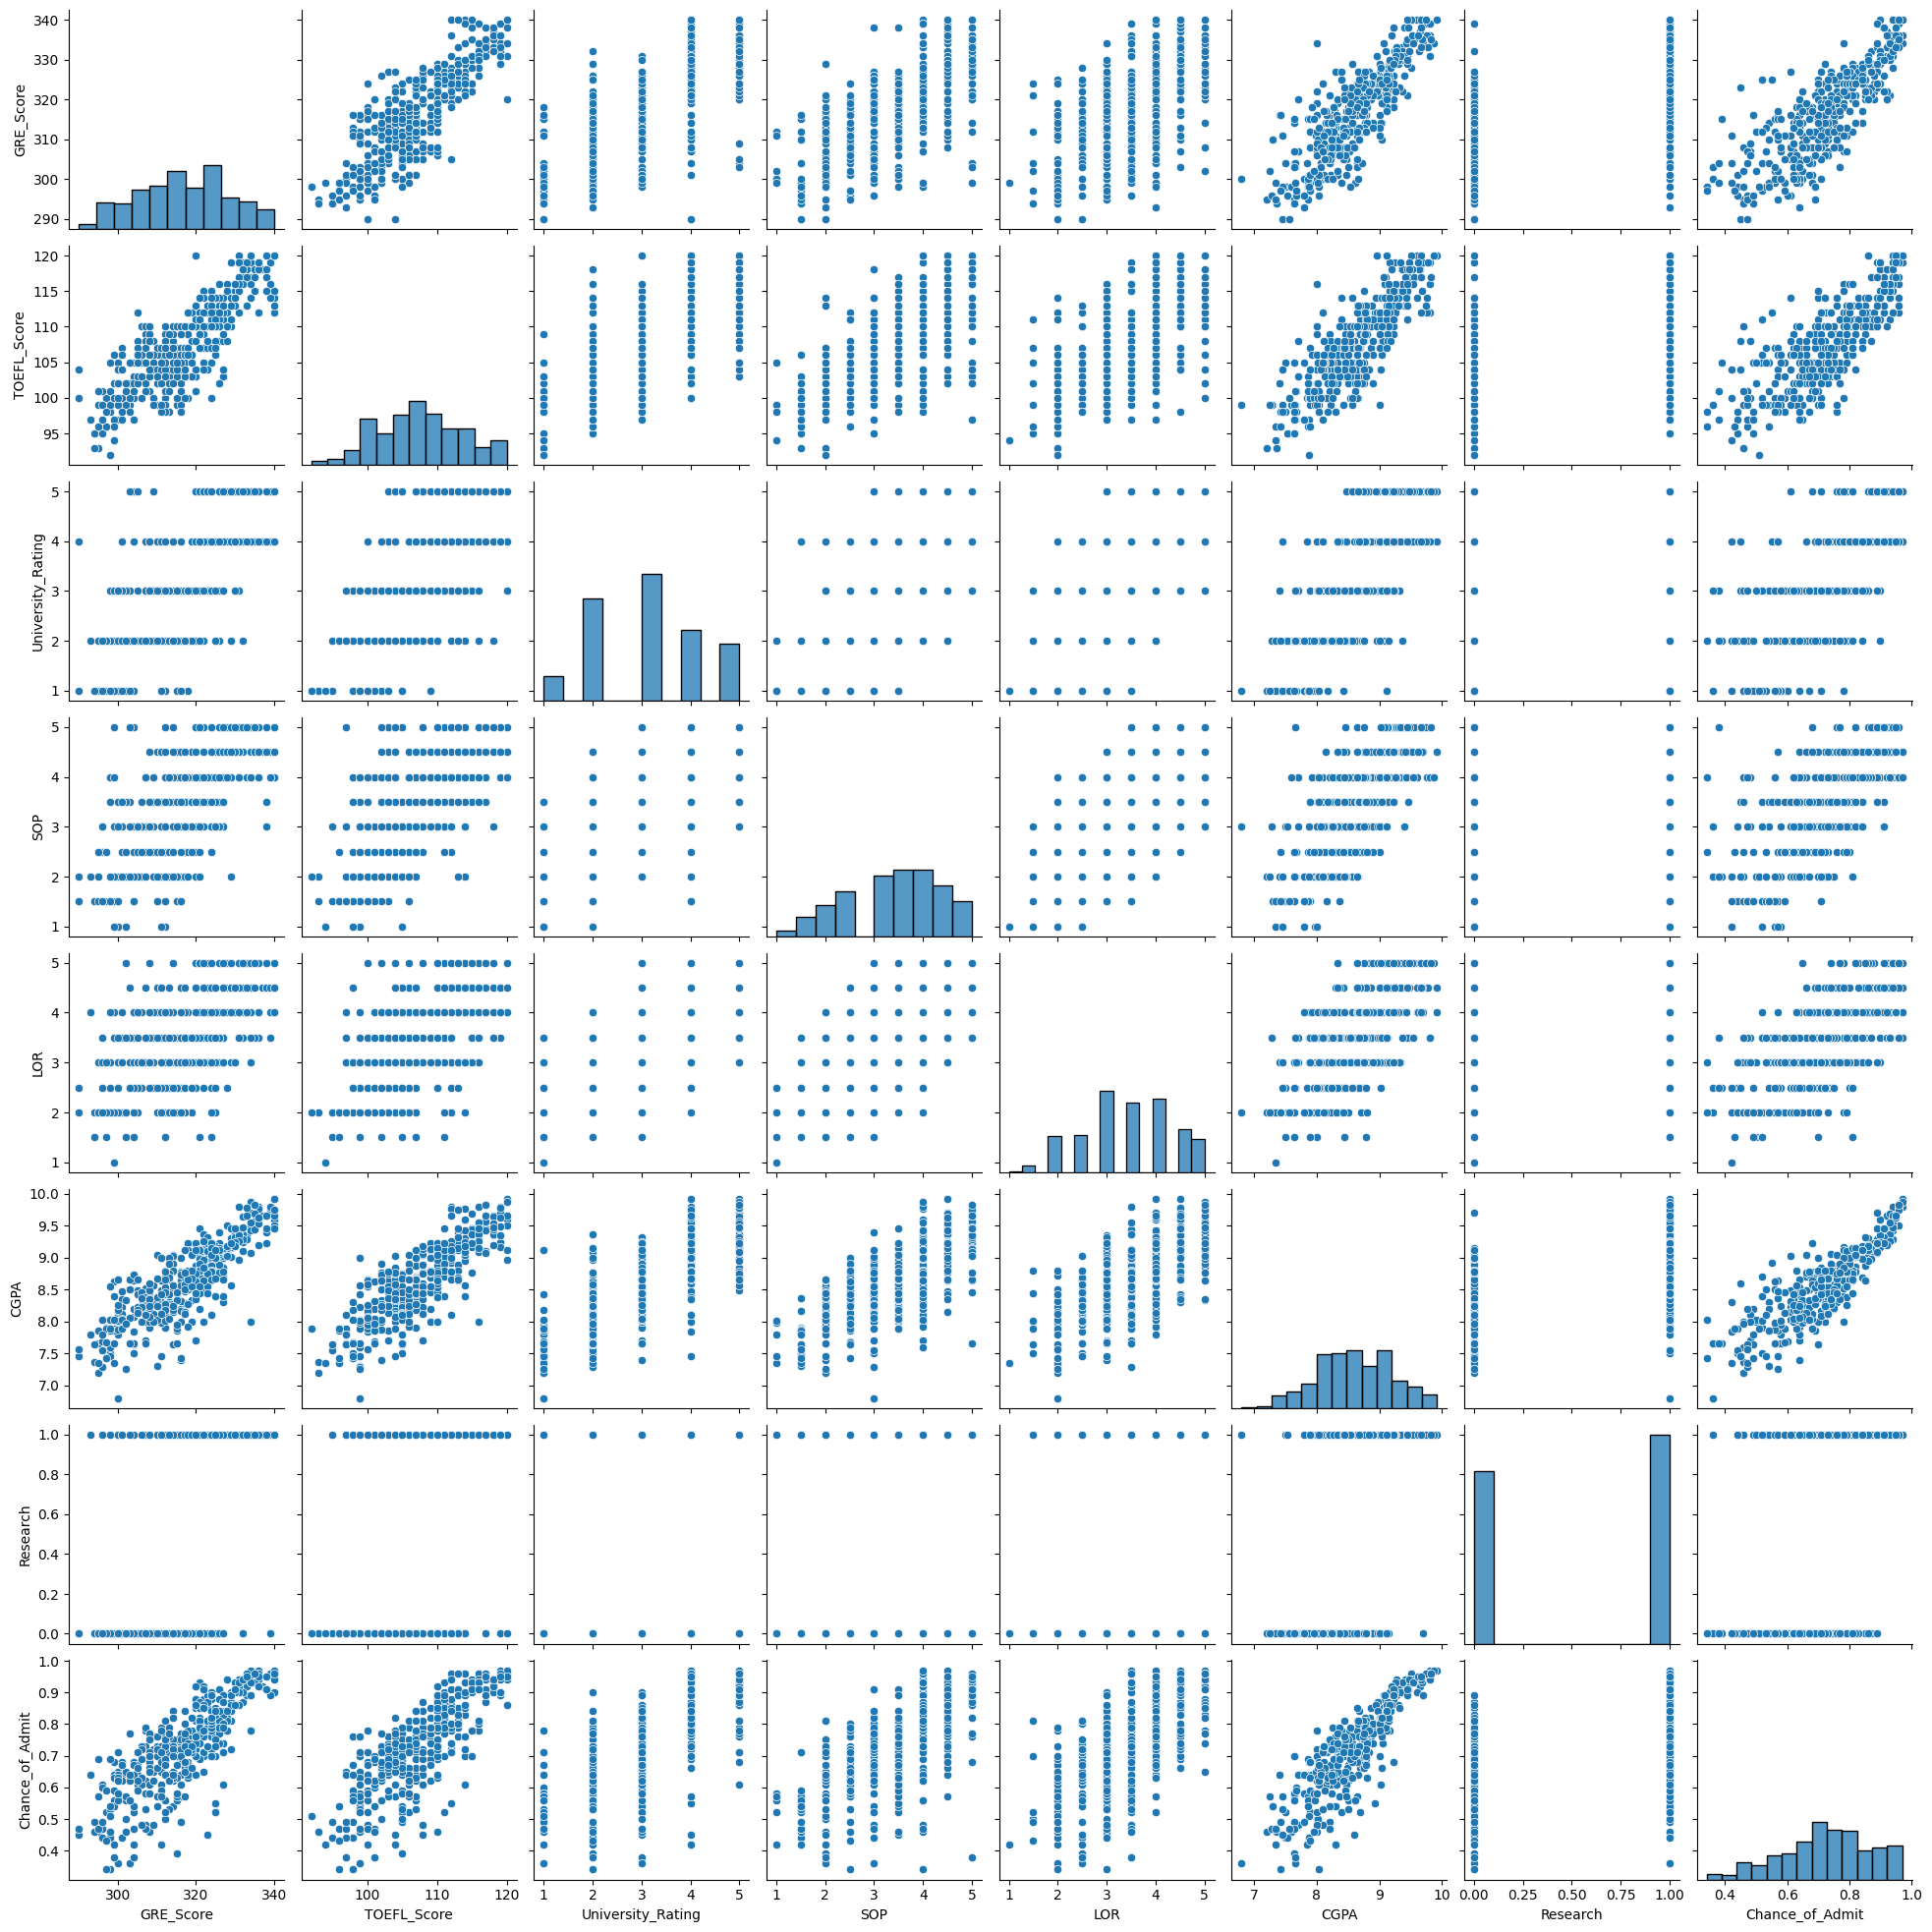

In [22]:
# pairplot
sns.pairplot(df)


In [23]:
# features & traget split
X = df.drop("Chance_of_Admit", axis=1)
y = df["Chance_of_Admit"]


In [24]:
# train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# multicollinearity
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


             Feature          VIF
0          GRE_Score  1438.451789
1        TOEFL_Score  1349.746948
2  University_Rating    22.143705
3                SOP    38.050177
4                LOR    38.411722
5               CGPA  1080.491179
6           Research     2.859938


In [26]:
# model fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression R^2 Score: 0.8212082591486993


In [27]:
# decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree R^2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree R^2 Score: 0.6331325501680588


In [28]:
# Hyperparameter tuning
param_grid_dt = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Tuned Decision Tree R^2:", r2_score(y_test, best_dt.predict(X_test)))



Tuned Decision Tree R^2: 0.7921210170415511


In [30]:
# random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest R^2 Score: 0.8066077140670239


In [31]:
#  hyperparameter tuning (RandomizedSearchCV for speed)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rand_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_grid_rf,
                             n_iter=20, cv=5, scoring='r2', random_state=42)
rand_rf.fit(X_train, y_train)

best_rf = rand_rf.best_estimator_
print("Tuned Random Forest R^2:", r2_score(y_test, best_rf.predict(X_test)))


Tuned Random Forest R^2: 0.8170920722806295


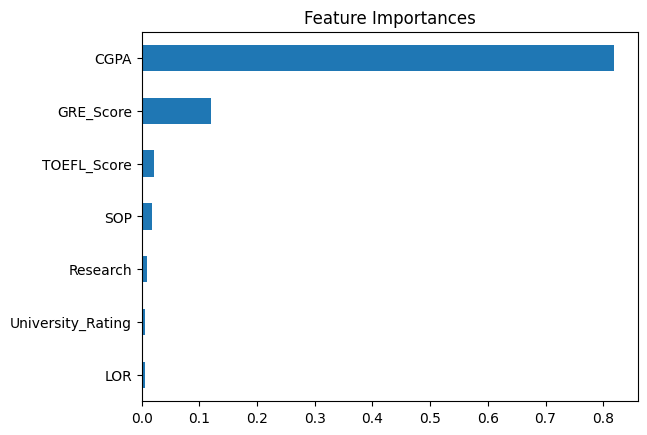

In [32]:
# plot feature importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()


In [42]:
# using features
top5_features = importances.sort_values(ascending=False).head(5).index
X_top5 = df[top5_features]

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_top5, y, test_size=0.2, random_state=42)

rf_5 = RandomForestRegressor(random_state=42)
rf_5.fit(X_train_5, y_train_5)

print("R^2 with Top 5 Features:", r2_score(y_test_5, rf_5.predict(X_test_5)))


R^2 with Top 5 Features: 0.7877736182417202


In [51]:
# final prediction
sample = pd.DataFrame({
    'GRE_Score': [322],
    'TOEFL_Score': [111],
    'University_Rating': [3],
    'SOP': [4],
    'LOR': [4],
    'CGPA': [8.9],
    'Research': [1]
})

prediction = best_rf.predict(sample)
print(f"Predicted Admission Chance: {prediction[0]*100:.2f}%")


Predicted Admission Chance: 79.10%
